In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')
 
df = pd.read_csv("bank_additional_full_cleaned.csv")
 
 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(12)

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [6]:
df = df.drop(columns=['duration', 'pdays', 'previous'], errors='ignore')

In [7]:
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,0


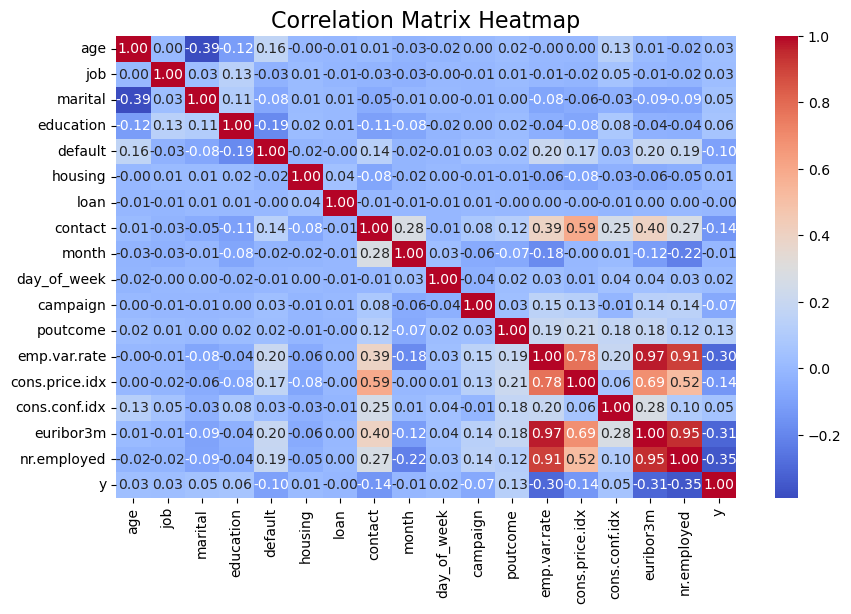

In [8]:
corr_matrix = df.corr()
import matplotlib.pyplot as plt
import seaborn as sns   
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

In [9]:
df_dropped = df.drop(columns=["emp.var.rate", "nr.employed"],inplace=True)

In [10]:

X = df.drop('y', axis=1)
y = df['y']

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from imblearn.over_sampling import SMOTE

print("Before SMOTE:")
print(y_train.value_counts())

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(y_train.value_counts())

Before SMOTE:
y
0    29229
1     3711
Name: count, dtype: int64

After SMOTE:
y
0    29229
1    29229
Name: count, dtype: int64


In [12]:
model = Sequential([
    Dense(64, activation="relu",input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")   
])

In [13]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
 

In [14]:
 
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,verbose=1
)

Epoch 1/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8829 - loss: 0.3267 - val_accuracy: 0.8931 - val_loss: 0.2970
Epoch 2/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8990 - loss: 0.2936 - val_accuracy: 0.8956 - val_loss: 0.2930
Epoch 3/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8991 - loss: 0.2909 - val_accuracy: 0.8960 - val_loss: 0.2910
Epoch 4/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9011 - loss: 0.2876 - val_accuracy: 0.8947 - val_loss: 0.2920
Epoch 5/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9010 - loss: 0.2859 - val_accuracy: 0.8945 - val_loss: 0.2923
Epoch 6/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9007 - loss: 0.2850 - val_accuracy: 0.8945 - val_loss: 0.2912
Epoch 7/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9015 - loss: 0.2841 - val_accuracy: 0.8944 - val_loss: 0.2924
Epoch 8/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9009 - loss: 0.2839 - val_accuracy: 0.

In [15]:
 
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5) 

 
print(f" Accuracy: {model.evaluate(X_test_scaled, y_test, verbose=0)[1]:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
 Accuracy: 0.8985

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7308
           1       0.67      0.19      0.30       928

    accuracy                           0.90      8236
   macro avg       0.79      0.59      0.62      8236
weighted avg       0.88      0.90      0.87      8236


Confusion Matrix:
[[7222   86]
 [ 750  178]]
